100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


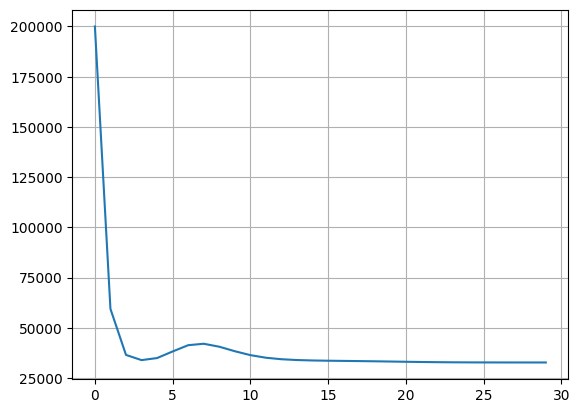

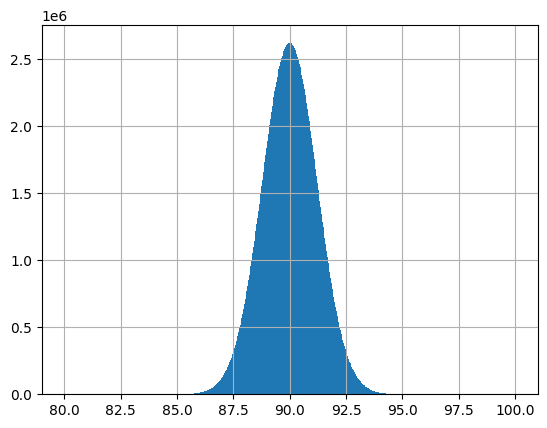

In [4]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

num_vec = 20000
num_dim = 2000
num_steps = 30
torch.manual_seed(0)

X = torch.randn(num_dim, num_vec)
X /= X.norm(p=2, dim=0, keepdim=True)
X.requires_grad_(True)
optimizer = torch.optim.Adam([X], lr=0.01)
losses = [0] * num_steps

for step_num in tqdm(range(num_steps)):
    optimizer.zero_grad()
    xtx = torch.matmul(torch.transpose(X, 0, 1), X)
    diff = xtx - torch.eye(num_vec, num_vec)
    loss = torch.sum(torch.pow(diff,2)) + torch.sum(torch.pow(torch.diag(diff), 2))
    loss.backward()
    optimizer.step()
    losses[step_num] = loss.item()

plt.plot(losses)
plt.grid(1)
plt.show()

with torch.no_grad():
    X /= X.norm(p=2, dim=0, keepdim=True)
    xtx = torch.matmul(torch.transpose(X, 0, 1), X)
    angles_degrees = torch.rad2deg(torch.acos(xtx))
    self_orthogonality_mask = ~(torch.eye(num_vec, num_vec).bool())
plt.hist(angles_degrees[self_orthogonality_mask].numpy().ravel(), bins=1000, range=(80, 100))
plt.grid(1)
plt.show()